### PLAN

1. EDA
2. Clustering
    - PCA (maybe)
    - Elbow method to find n_clusters
    - Performing KMeans
    - interpreting the clusters characteristics
3. Prediciting churn
4. Conclusion


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../../Data/main/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA

In [3]:
# dropping customerID
df.drop(columns=['customerID'], inplace=True)

# converting TotalCharges to float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# dropping rows with NaN values
df.dropna(inplace=True)

# replacing No: 0, Yes: 1
simple_cats = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in simple_cats:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


complex_cats = [
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in complex_cats:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

for col in complex_cats:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


# replacing Male: 1, Female: 0
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# one hot encoding the remaining non-numerics (result is in True/False)
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'])



df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False


## Clustering

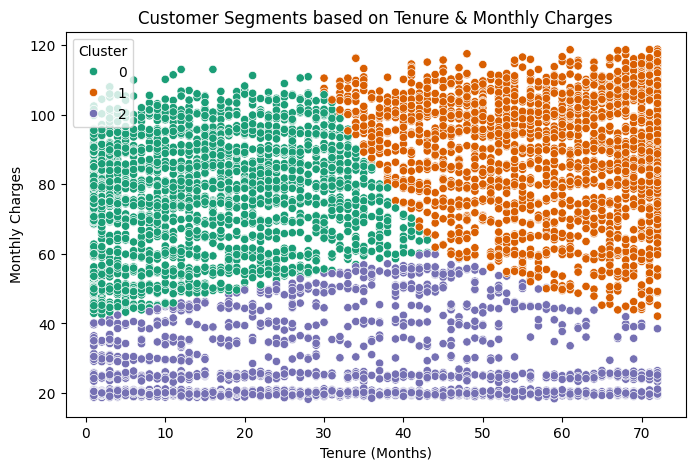

In [7]:
# selecting features
clustering_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_clustering = df[clustering_features]

# scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# fitting the model
kmeans = KMeans(3)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['tenure'], y=df['MonthlyCharges'], hue=df['Cluster'], palette="Dark2")
plt.title('Customer Segments based on Tenure & Monthly Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()